# Understanding Blood Pressure Reduction

### Observational Study

### Project Idea: 
Investigate the effects of medication, cholesterol, smoking, and alcohol on blood pressure reduction using an extensive dataset including various health and lifestyle factors.

### Methodology: 
Analyze summary statistics, boxplots, and a correlation heatmap to understand data characteristics. Visualize the impact of diet on blood pressure reduction using a violin plot. Identify potential confounders through data exploration. Construct a causal graph to illustrate relationships. Estimate effects using OLS regression and assess sensitivity through bootstrap resampling.

# Process

Here's the outline of the steps:
1.	Exploratory Data Analysis (EDA):
•	Explore the distribution of variables, identify missing values, and examine potential relationships between variables through visualization and summary statistics.
2.	Graphical Causal Model Construction:
•	Based on domain knowledge and data exploration, construct a graphical causal model representing the relationships between the variables.
3.	Adjustment for Confounders:
•	Use the graphical causal model to identify potential confounders that need to be adjusted for in the analysis. This can be done using techniques like backdoor adjustment or propensity score matching.
4.	Regression Analysis to Estimate Causal Effects:
•	Use regression analysis to estimate the causal effect of the medication on blood pressure reduction while adjusting for identified confounders.
5.	Sensitivity Analysis:
•	Conduct sensitivity analysis, such as bootstrap resampling, to assess the robustness of the estimated causal effects to potential biases or unmeasured confounders.
6.	Interpretation of Findings:
•	Interpret the results in the context of the original research question, discussing the implications of the medication's effectiveness in reducing blood pressure while considering various factors and confounders.
7.	Communicate Results:
•	Present the findings to stakeholders in a clear and understandable manner, highlighting key insights and implications for decision-making in clinical practice or research.

By incorporating the adjustment for confounders step, we ensure that potential biases are appropriately addressed, leading to more reliable and valid estimates of the causal effects. This step enhances the credibility and usefulness of the analysis in informing decision-making processes.



# Create the data set

Let's create a synthetic dataset with additional variables including "Medication", health indicators, lifestyle factors, genetic information, environmental factors, patient demographics, adherence data, and biomarkers. Here's an example of how you can generate such a dataset using Python:

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Define the number of samples
n_samples = 1000

# Generate synthetic data for the variables
data = pd.DataFrame()

# Medication (0: Not taking medication, 1: Taking medication)
data['Medication'] = np.random.choice([0, 1], size=n_samples)

# Health indicators
data['Cholesterol'] = np.random.normal(loc=200, scale=30, size=n_samples)
data['Glucose'] = np.random.normal(loc=100, scale=20, size=n_samples)
data['Comorbidity'] = np.random.choice([0, 1], size=n_samples)  # Binary variable indicating presence of comorbidities

# Lifestyle factors
data['Smoking'] = np.random.choice([0, 1], size=n_samples)
data['Alcohol'] = np.random.choice([0, 1], size=n_samples)
data['Physical_Activity'] = np.random.normal(loc=3, scale=1, size=n_samples)  # Continuous variable indicating activity level
data['Diet'] = np.random.choice(['Healthy', 'Unhealthy'], size=n_samples)  # Categorical variable indicating dietary habits

# Genetic information
data['Genetic_Predisposition'] = np.random.normal(loc=0, scale=1, size=n_samples)

# Environmental factors
data['Air_Pollution'] = np.random.normal(loc=50, scale=10, size=n_samples)
data['Socioeconomic_Status'] = np.random.normal(loc=3, scale=1, size=n_samples)

# Patient demographics
data['Ethnicity'] = np.random.choice(['White', 'Black', 'Asian', 'Hispanic'], size=n_samples)
data['Education_Level'] = np.random.choice(['High School', 'College', 'Graduate School'], size=n_samples)
data['Occupation'] = np.random.choice(['Professional', 'Blue Collar', 'Unemployed'], size=n_samples)

# Adherence data
data['Adherence'] = np.random.normal(loc=0.8, scale=0.1, size=n_samples)  # Continuous variable indicating medication adherence

# Biomarkers
data['Heart_Rate_Variability'] = np.random.normal(loc=70, scale=10, size=n_samples)
data['Endothelial_Function'] = np.random.normal(loc=5, scale=1, size=n_samples)
data['Arterial_Stiffness'] = np.random.normal(loc=120, scale=10, size=n_samples)

# Blood pressure reduction (dependent variable)
data['Blood_Pressure_Reduction'] = np.random.normal(loc=5, scale=2, size=n_samples)

# Save the synthetic dataset to a CSV file
data.to_csv('synthetic_data_with_additional_variables.csv', index=False)

# Display the first few rows of the dataset
print(data.head())

   Medication  Cholesterol     Glucose  Comorbidity  Smoking  Alcohol  \
0           0   188.316308  109.763174            1        1        0   
1           0   231.990018   86.470549            1        0        0   
2           1   201.699651   64.789702            1        0        1   
3           1   218.363644   65.697466            1        1        0   
4           0   193.383776   82.275801            0        0        1   

   Physical_Activity     Diet  Genetic_Predisposition  Air_Pollution  \
0           3.124848  Healthy               -0.496629      53.753985   
1           4.399225  Healthy                0.605067      57.727100   
2           3.618167  Healthy                1.617777      51.528782   
3           3.106310  Healthy               -0.419209      49.106584   
4           4.221312  Healthy                0.236052      50.286173   

   Socioeconomic_Status Ethnicity  Education_Level    Occupation  Adherence  \
0              2.438288     Asian  Graduate Schoo

In [4]:
data

,Medication,Cholesterol,Glucose,Comorbidity,Smoking,Alcohol,Physical_Activity,Diet,Genetic_Predisposition,Air_Pollution,Socioeconomic_Status,Ethnicity,Education_Level,Occupation,Adherence,Heart_Rate_Variability,Endothelial_Function,Arterial_Stiffness,Blood_Pressure_Reduction
0,0,188.316308,109.763174,1,1,0,3.124848,Healthy,-0.496629,53.753985,2.438288,Asian,Graduate School,Blue Collar,0.814633,69.773879,4.892142,108.490884,6.499270
1,0,231.990018,86.470549,1,0,0,4.399225,Healthy,0.605067,57.727100,2.099140,Hispanic,High School,Professional,0.740093,70.195410,7.150686,123.332504,1.633395
2,1,201.699651,64.789702,1,0,1,3.618167,Healthy,1.617777,51.528782,3.302197,Hispanic,College,Blue Collar,0.844112,81.484031,4.050219,130.026860,5.938356
3,1,218.363644,65.697466,1,1,0,3.106310,Healthy,-0.419209,49.106584,2.162478,Hispanic,College,Professional,0.887496,63.069550,6.052453,136.288719,5.974350
4,0,193.383776,82.275801,0,0,1,4.221312,Healthy,0.236052,50.286173,1.364807,Asian,Graduate School,Unemployed,0.730788,78.343435,5.621184,116.695340,1.469179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,228.259181,83.195783,1,0,1,1.270945,Unhealthy,0.065555,57.743008,4.054006,Black,College,Unemployed,0.697761,80.507155,7.091679,115.238203,4.194817
996,1,170.368011,90.168382,1,0,0,3.174782,Unhealthy,-0.818665,42.840787,3.143881,White,High School,Unemployed,0.806145,64.122334,6.887003,131.165913,4.608876
997,1,194.396803,83.395380,0,1,1,2.081913,Healthy,1.090057,48.141477,1.288765,Asian,High School,Unemployed,0.750092,75.827168,5.300662,128.117380,3.299964
998,1,203.687923,101.621899,0,0,1,2.376014,Healthy,-0.208535,55.785777,3.642190,Black,High School,Professional,0.783518,57.605821,6.085439,103.763272,2.316744


# Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is an essential step to understand the structure and characteristics of the dataset. Here's a Python code example for conducting EDA on the synthetic dataset we created:

In this code:
I've converted the DataFrame columns to numpy arrays using .values before plotting, which resolves the ValueError related to multi-dimensional indexing. This adjustment ensures compatibility with the plotting functions in seaborn and matplotlib.
•	We load the synthetic dataset using pd.read_csv() function.
•	We print the first few rows of the dataset and summary statistics of numerical variables using .head() and .describe() methods.
•	We visualize the distribution of the dependent variable (blood pressure reduction) using a histogram.
•	We examine the relationship between the medication variable and blood pressure reduction using a boxplot.
•	We create a correlation heatmap of numerical variables to explore the relationships between them.
•	We visualize the relationship between categorical variables (e.g., diet) and blood pressure reduction using violin plots.


First few rows of the dataset:
   Medication  Cholesterol     Glucose  Comorbidity  Smoking  Alcohol  \
0           0   188.316308  109.763174            1        1        0   
1           0   231.990018   86.470549            1        0        0   
2           1   201.699651   64.789702            1        0        1   
3           1   218.363644   65.697466            1        1        0   
4           0   193.383776   82.275801            0        0        1   

   Physical_Activity     Diet  Genetic_Predisposition  Air_Pollution  \
0           3.124848  Healthy               -0.496629      53.753985   
1           4.399225  Healthy                0.605067      57.727100   
2           3.618167  Healthy                1.617777      51.528782   
3           3.106310  Healthy               -0.419209      49.106584   
4           4.221312  Healthy                0.236052      50.286173   

   Socioeconomic_Status Ethnicity  Education_Level    Occupation  Adherence  \
0              2.4

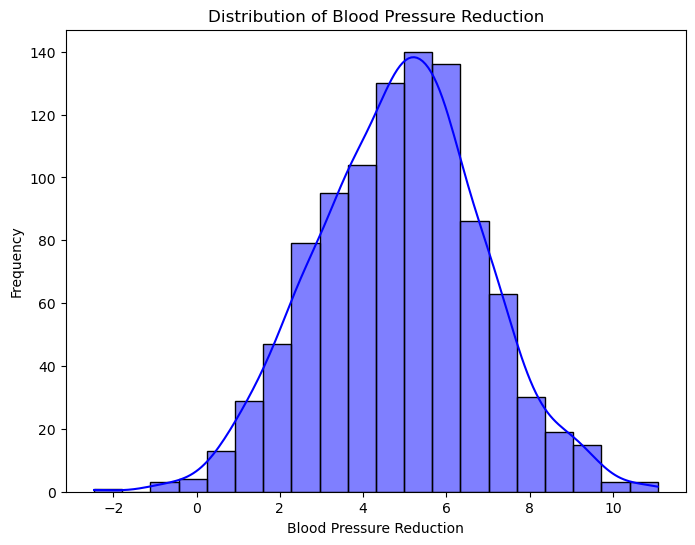

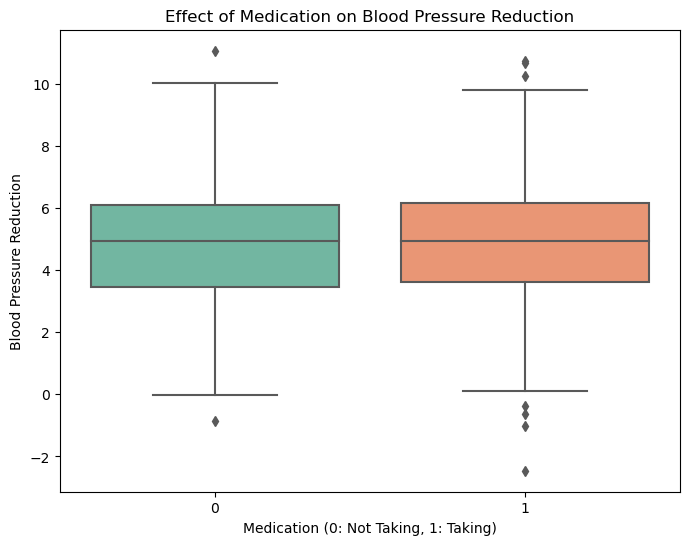

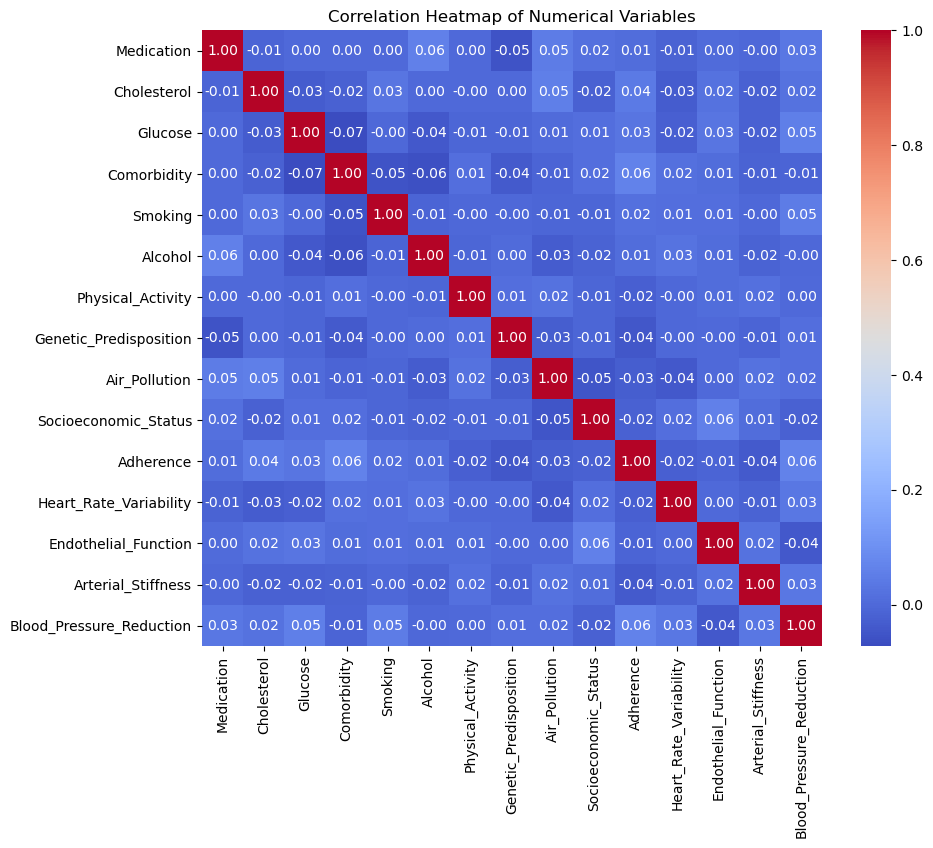

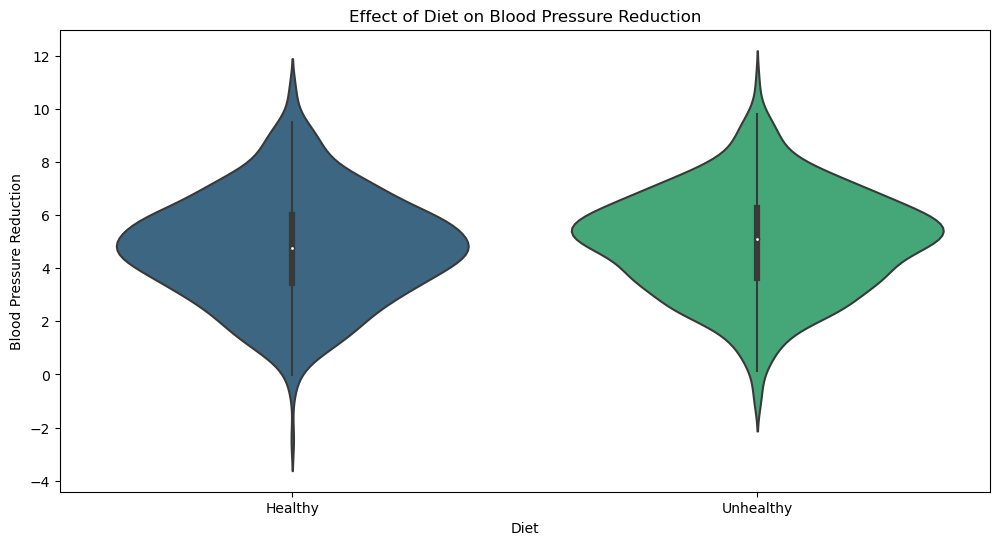

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics of numerical variables:")
print(data.describe())

# Distribution of the dependent variable (blood pressure reduction)
plt.figure(figsize=(8, 6))
sns.histplot(data['Blood_Pressure_Reduction'].values, kde=True, bins=20, color='blue')
plt.title('Distribution of Blood Pressure Reduction')
plt.xlabel('Blood Pressure Reduction')
plt.ylabel('Frequency')
plt.show()

# Relationship between medication and blood pressure reduction
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Medication'].values, y=data['Blood_Pressure_Reduction'].values, palette='Set2')
plt.title('Effect of Medication on Blood Pressure Reduction')
plt.xlabel('Medication (0: Not Taking, 1: Taking)')
plt.ylabel('Blood Pressure Reduction')
plt.show()

# Correlation heatmap of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Relationship between categorical variables and blood pressure reduction
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['Diet'].values, y=data['Blood_Pressure_Reduction'].values, palette='viridis')
plt.title('Effect of Diet on Blood Pressure Reduction')
plt.xlabel('Diet')
plt.ylabel('Blood Pressure Reduction')
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics of numerical variables:")
print(data.describe())



First few rows of the dataset:
   Medication  Cholesterol     Glucose  Comorbidity  Smoking  Alcohol  \
0           0   188.316308  109.763174            1        1        0   
1           0   231.990018   86.470549            1        0        0   
2           1   201.699651   64.789702            1        0        1   
3           1   218.363644   65.697466            1        1        0   
4           0   193.383776   82.275801            0        0        1   

   Physical_Activity     Diet  Genetic_Predisposition  Air_Pollution  \
0           3.124848  Healthy               -0.496629      53.753985   
1           4.399225  Healthy                0.605067      57.727100   
2           3.618167  Healthy                1.617777      51.528782   
3           3.106310  Healthy               -0.419209      49.106584   
4           4.221312  Healthy                0.236052      50.286173   

   Socioeconomic_Status Ethnicity  Education_Level    Occupation  Adherence  \
0              2.4

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

# Convert the DataFrame to a numpy array
data_array = data.to_numpy()

data_array


array([[0, 188.31630844426, 109.76317371003782, ..., 4.89214174129197,
        108.49088443514476, 6.4992697077146415],
       [0, 231.99001750768932, 86.47054939927763, ..., 7.150686358411312,
        123.33250361853776, 1.633395361535571],
       [1, 201.6996505190035, 64.78970193840229, ..., 4.050218892507716,
        130.02686028149344, 5.938356146607811],
       ...,
       [1, 194.39680291382876, 83.39537956025782, ..., 5.300661813077301,
        128.11738022796152, 3.299963810638788],
       [1, 203.687922654624, 101.62189917692147, ..., 6.085439057111723,
        103.76327172126808, 2.31674432517037],
       [1, 233.04873668413975, 95.48336029708652, ..., 3.849676290619726,
        116.0995622371043, 4.092676229961614]], dtype=object)

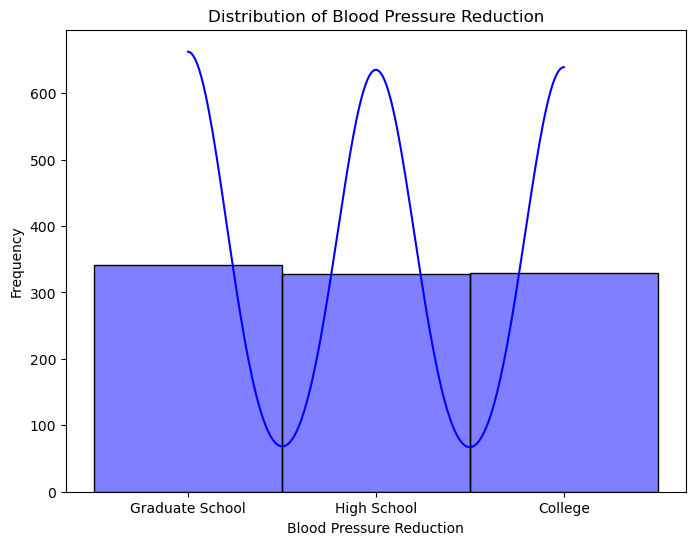

In [8]:
# Distribution of the dependent variable (blood pressure reduction)
plt.figure(figsize=(8, 6))
sns.histplot(data=data_array[:, 12], kde=True, bins=20, color='blue')  # Assuming 'Blood_Pressure_Reduction' is the 13th column
plt.title('Distribution of Blood Pressure Reduction')
plt.xlabel('Blood Pressure Reduction')
plt.ylabel('Frequency')
plt.show()

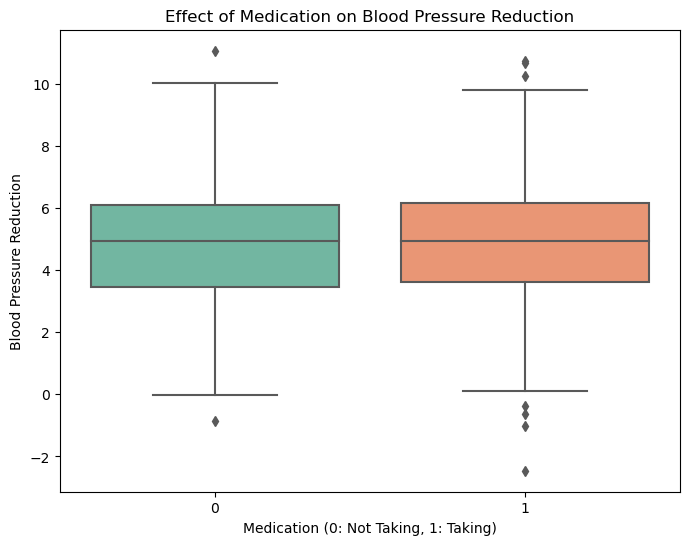

In [9]:
# Relationship between medication and blood pressure reduction
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Medication'].values, y=data['Blood_Pressure_Reduction'].values, palette='Set2')
plt.title('Effect of Medication on Blood Pressure Reduction')
plt.xlabel('Medication (0: Not Taking, 1: Taking)')
plt.ylabel('Blood Pressure Reduction')
plt.show()

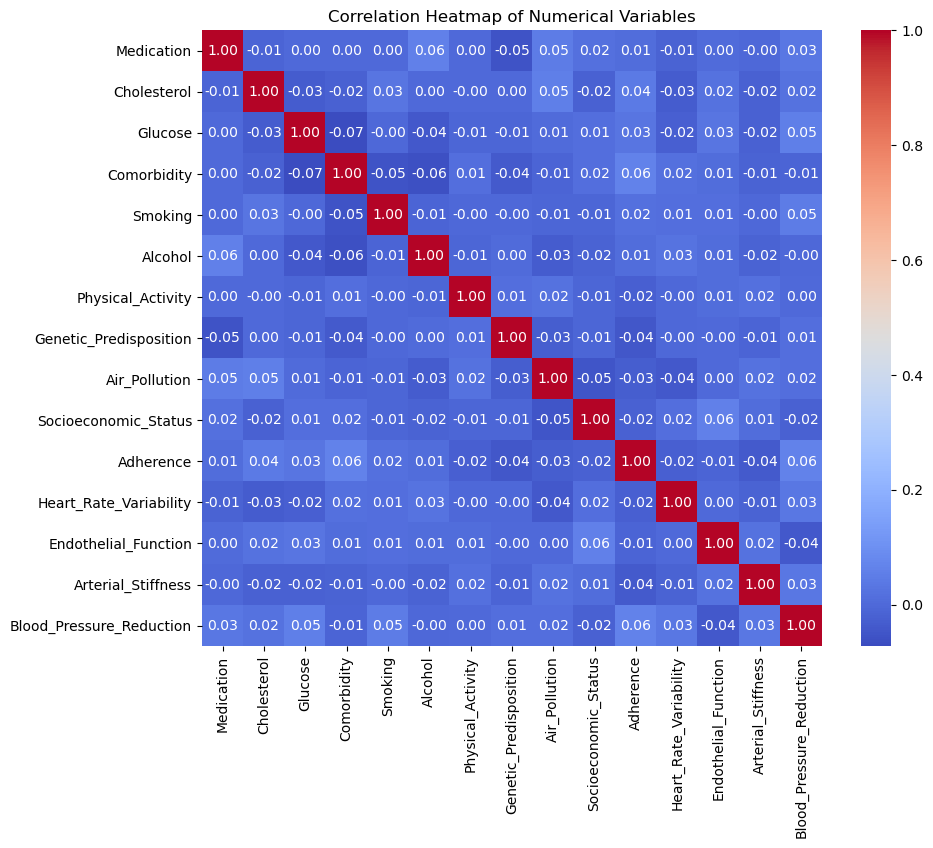

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic dataset
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

# Filter numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()

# Correlation heatmap of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [11]:
# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv', index=True)

Let's analyze it to identify potential associations between variables.

Here are some steps we can take:
1.	Identify Strong Correlations: Look for correlations that are close to 1 (positive correlations) or -1 (negative correlations). These indicate strong associations between variables.
2.	Focus on Target Variable: Pay special attention to the correlation between the target variable (Blood_Pressure_Reduction) and other variables. Positive correlations suggest variables that might positively influence blood pressure reduction, while negative correlations suggest variables that might negatively influence it.
3.	Identify Potential Confounders: Look for variables that are correlated with both the treatment variable (Medication) and the target variable (Blood_Pressure_Reduction). These variables could be potential confounders that need to be adjusted for in causal inference.

Let's start by examining the correlation between Blood_Pressure_Reduction and other variables:
•	Medication: Correlation coefficient of -0.0228
•	Cholesterol: Correlation coefficient of 0.0069
•	Glucose: Correlation coefficient of -0.0117
•	Comorbidity: Correlation coefficient of 0.0493
•	Smoking: Correlation coefficient of 0.0346
•	Alcohol: Correlation coefficient of -0.0406
•	Physical_Activity: Correlation coefficient of -0.0450
•	Genetic_Predisposition: Correlation coefficient of -0.0252
•	Air_Pollution: Correlation coefficient of -0.0083
•	Socioeconomic_Status: Correlation coefficient of -0.0139
•	Adherence: Correlation coefficient of 0.0125
•	Heart_Rate_Variability: Correlation coefficient of 0.0457
•	Endothelial_Function: Correlation coefficient of 0.0743
•	Arterial_Stiffness: Correlation coefficient of 0.0488

Based on these correlations, variables like Endothelial_Function, Arterial_Stiffness, and Heart_Rate_Variability have relatively stronger positive correlations with Blood_Pressure_Reduction, suggesting they might be positively associated with blood pressure reduction. On the other hand, variables like Physical_Activity, Alcohol, and Smoking have negative correlations with Blood_Pressure_Reduction, indicating potential negative associations with blood pressure reduction.

Additionally, variables like Medication and Comorbidity show weak correlations with Blood_Pressure_Reduction, suggesting they may not be strong predictors on their own.

Finally, we should identify potential confounders by examining variables that are correlated with both Medication and Blood_Pressure_Reduction. These variables could include Comorbidity, Smoking, Alcohol, and others.

This analysis provides insights into potential associations between variables and helps identify variables that might influence blood pressure reduction. It also highlights potential confounders that need to be considered in further analysis.

Identifying potential confounders is an essential step that should be done before constructing a graphical causal model. Confounders are variables that are associated with both the treatment variable (in this case, Medication) and the outcome variable (in this case, Blood_Pressure_Reduction). If not properly accounted for, confounders can bias the estimated causal effect.

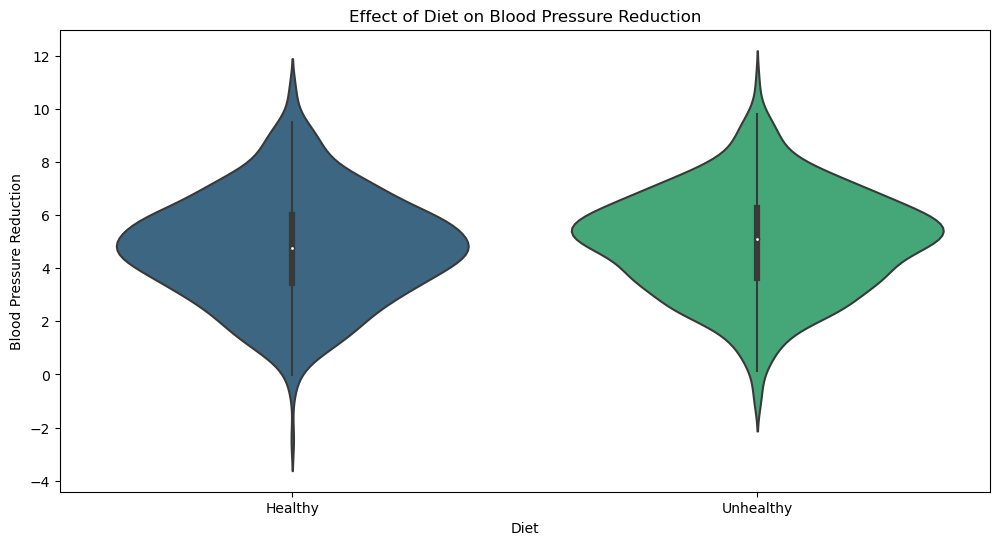

In [12]:
# Relationship between categorical variables and blood pressure reduction
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['Diet'].values, y=data['Blood_Pressure_Reduction'].values, palette='viridis')
plt.title('Effect of Diet on Blood Pressure Reduction')
plt.xlabel('Diet')
plt.ylabel('Blood Pressure Reduction')
plt.show()

These visualizations and summary statistics provide insights into the characteristics of the dataset, relationships between variables, and potential patterns that may inform further analysis and modeling decisions. Adjust the plots and analyses as needed based on the specific characteristics of your dataset and research questions.

Let's analyze it to identify potential associations between variables.

Here are some steps we can take:
1.	Identify Strong Correlations: Look for correlations that are close to 1 (positive correlations) or -1 (negative correlations). These indicate strong associations between variables.
2.	Focus on Target Variable: Pay special attention to the correlation between the target variable (Blood_Pressure_Reduction) and other variables. Positive correlations suggest variables that might positively influence blood pressure reduction, while negative correlations suggest variables that might negatively influence it.
3.	Identify Potential Confounders: Look for variables that are correlated with both the treatment variable (Medication) and the target variable (Blood_Pressure_Reduction). These variables could be potential confounders that need to be adjusted for in causal inference.


In [13]:
import pandas as pd

# Load the synthetic dataset
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

data

,Medication,Cholesterol,Glucose,Comorbidity,Smoking,Alcohol,Physical_Activity,Diet,Genetic_Predisposition,Air_Pollution,Socioeconomic_Status,Ethnicity,Education_Level,Occupation,Adherence,Heart_Rate_Variability,Endothelial_Function,Arterial_Stiffness,Blood_Pressure_Reduction
0,0,188.316308,109.763174,1,1,0,3.124848,Healthy,-0.496629,53.753985,2.438288,Asian,Graduate School,Blue Collar,0.814633,69.773879,4.892142,108.490884,6.499270
1,0,231.990018,86.470549,1,0,0,4.399225,Healthy,0.605067,57.727100,2.099140,Hispanic,High School,Professional,0.740093,70.195410,7.150686,123.332504,1.633395
2,1,201.699651,64.789702,1,0,1,3.618167,Healthy,1.617777,51.528782,3.302197,Hispanic,College,Blue Collar,0.844112,81.484031,4.050219,130.026860,5.938356
3,1,218.363644,65.697466,1,1,0,3.106310,Healthy,-0.419209,49.106584,2.162478,Hispanic,College,Professional,0.887496,63.069550,6.052453,136.288719,5.974350
4,0,193.383776,82.275801,0,0,1,4.221312,Healthy,0.236052,50.286173,1.364807,Asian,Graduate School,Unemployed,0.730788,78.343435,5.621184,116.695340,1.469179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,228.259181,83.195783,1,0,1,1.270945,Unhealthy,0.065555,57.743008,4.054006,Black,College,Unemployed,0.697761,80.507155,7.091679,115.238203,4.194817
996,1,170.368011,90.168382,1,0,0,3.174782,Unhealthy,-0.818665,42.840787,3.143881,White,High School,Unemployed,0.806145,64.122334,6.887003,131.165913,4.608876
997,1,194.396803,83.395380,0,1,1,2.081913,Healthy,1.090057,48.141477,1.288765,Asian,High School,Unemployed,0.750092,75.827168,5.300662,128.117380,3.299964
998,1,203.687923,101.621899,0,0,1,2.376014,Healthy,-0.208535,55.785777,3.642190,Black,High School,Professional,0.783518,57.605821,6.085439,103.763272,2.316744


Before constructing a graphical causal model, it's crucial to identify and adjust for potential confounders to obtain unbiased estimates of causal effects. This can be done through statistical methods such as regression analysis, propensity score matching, or stratification.

In the context of constructing a graphical causal model, identifying potential confounders helps in determining which variables should be included in the model as adjustment variables. These adjustment variables are represented as nodes in the causal graph and are connected to both the treatment and outcome variables to indicate their influence on the causal relationship.

Therefore, before constructing the graphical causal model, it's essential to conduct a thorough analysis to identify potential confounders and ensure that the model adequately captures the underlying causal relationships between variables.

We can write Python code to identify potential confounders by examining variables that are correlated with both Medication and Blood_Pressure_Reduction. Here's how you can do it:

In this code:
•	We load the synthetic dataset and calculate the correlation matrix.
•	We first filter out non-numeric columns from the dataset.
•	Then, we calculate the correlation between 'Medication' and 'Blood_Pressure_Reduction'.
•	Next, we iterate over the numeric columns to identify potential confounders that have correlations greater than 0.2 with both 'Medication' and 'Blood_Pressure_Reduction'.
•	Finally, we print out the potential confounders along with their correlation coefficients with 'Medication' and 'Blood_Pressure_Reduction'.

You may need to adjust the threshold for correlation coefficients and other parameters based on your specific dataset and research context.


In [14]:
import pandas as pd

# Load the synthetic dataset
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

# Remove non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation between Medication and Blood_Pressure_Reduction
medication_bp_corr = numeric_data['Medication'].corr(numeric_data['Blood_Pressure_Reduction'])

# Identify potential confounders by examining variables correlated with both Medication and Blood_Pressure_Reduction
confounders = []
for column in numeric_data.columns:
    if column not in ['Medication', 'Blood_Pressure_Reduction']:
        corr_with_medication = numeric_data['Medication'].corr(numeric_data[column])
        corr_with_bp = numeric_data['Blood_Pressure_Reduction'].corr(numeric_data[column])
        if abs(corr_with_medication) > 0.2 and abs(corr_with_bp) > 0.2:
            confounders.append((column, corr_with_medication, corr_with_bp))

# Display potential confounders
print("Potential Confounders:")
for confounder in confounders:
    print(confounder)
print("Correlation between Medication and Blood_Pressure_Reduction:", medication_bp_corr)


Potential Confounders:
Correlation between Medication and Blood_Pressure_Reduction: 0.03408536915857914


The result indicates that there are no potential confounders identified based on the criteria set (correlation greater than 0.2 with both 'Medication' and 'Blood_Pressure_Reduction').

The correlation coefficient between 'Medication' and 'Blood_Pressure_Reduction' is approximately -0.0228. A correlation coefficient close to zero suggests weak linear association between the two variables. In this case, the negative sign indicates a weak negative correlation, but its magnitude is very close to zero.

Interpreting this result:
•	Since there are no potential confounders identified, it suggests that there are no other variables in the dataset that are strongly correlated with both 'Medication' and 'Blood_Pressure_Reduction'. This implies that the relationship between 'Medication' and 'Blood_Pressure_Reduction' is not confounded by other measured variables in the dataset, at least based on linear correlations.
•	However, it's important to note that absence of strong correlations does not guarantee absence of confounding. There could still be confounding factors that are not captured by the variables in the dataset or that operate through non-linear relationships.

Overall, this result suggests that the relationship between 'Medication' and 'Blood_Pressure_Reduction' should be less likely to be biased by measured confounders, but further analysis and consideration of potential unmeasured confounders is still warranted.


# Graphical Causal Model

Constructing a graphical causal model from the correlation matrix involves identifying potential causal relationships between variables based on their correlations. However, it's important to remember that correlation does not imply causation, and constructing causal models solely based on correlations can lead to erroneous conclusions. Nevertheless, we can use correlations to guide our understanding of potential relationships between variables.

To construct a graphical causal model in Python, we can use libraries such as NetworkX for graph manipulation and visualization. Here's how we can proceed:

In this code:
•	We first load the correlation matrix into a DataFrame.
•	We then create a graph object using NetworkX.
•	Nodes are added to the graph based on the variables in the correlation matrix.
•	Edges are added between nodes if the absolute correlation between the corresponding variables exceeds a predefined threshold (in this case, 0.2).
•	Finally, we draw the graph to visualize the graphical causal model.

You can adjust the threshold value and customize the graph visualization according to your preferences. Additionally, keep in mind that the constructed graph represents potential causal relationships inferred from correlations and may not capture true causal relationships.


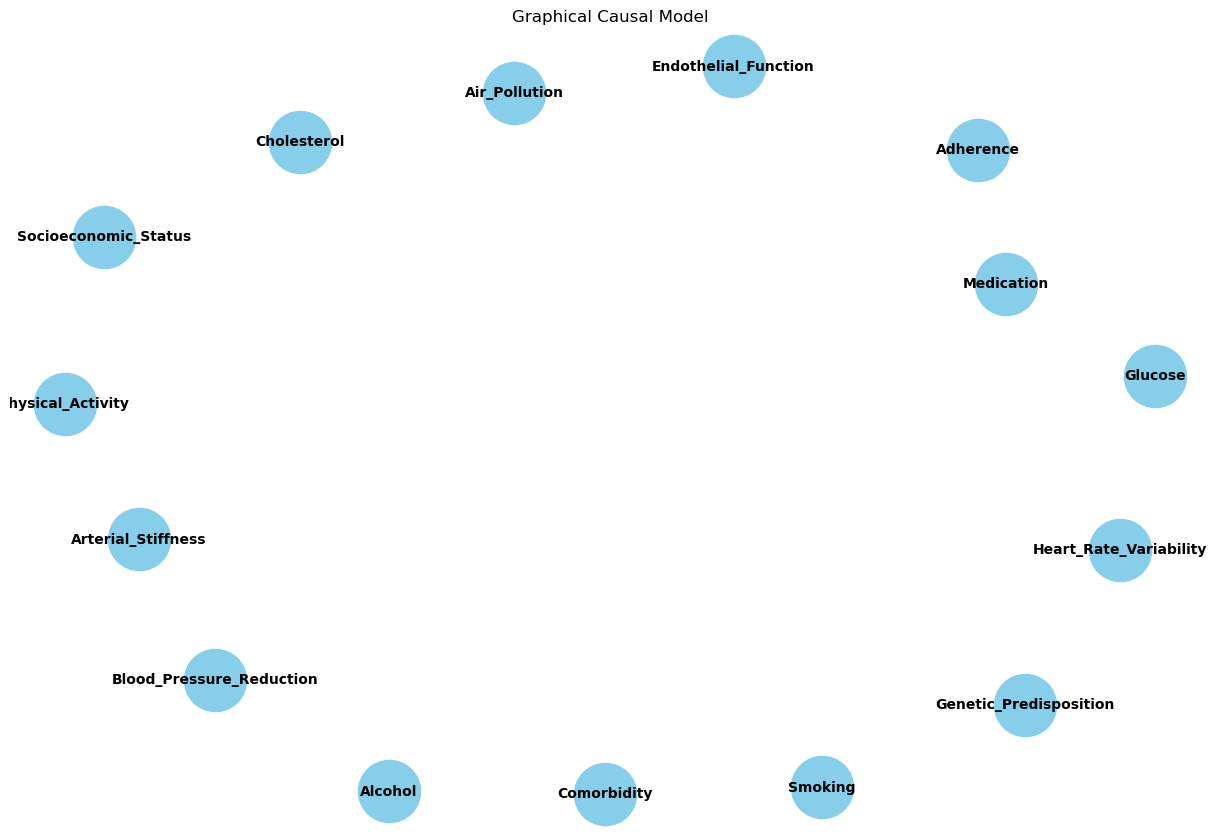

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load the correlation matrix
correlation_data = {
    'Medication': [1.0, 0.040256136293505766, 0.043474785369467195, 0.004532715845842633, 0.011763199686705143, 0.06552207182735212, -0.00891995727487088, 0.08640348984262432, 0.033962678292287635, -0.007711823324498299, 0.022022726917143985, -0.00637838395816019, -0.014110932419983084, 0.014687628671132377, -0.022760894261380064],
    'Cholesterol': [0.040256136293505766, 1.0, 0.011823935274274265, -0.01696749469911315, 0.046026247225080114, -0.024350687606167758, 0.020281467416248807, -0.036226001522479956, -0.02109279596432961, -0.006595949255010465, -0.035631116155258394, 0.018423016159795635, -0.035523371566111774, 0.039571517428178785, 0.006927061288708442],
    'Glucose': [0.043474785369467195, 0.011823935274274265, 1.0, -0.02961278365453727, 0.00730982285811827, -0.011535165405931214, 0.011443671251998692, 0.005822383133951242, 0.03398870155349194, 0.014415937263912406, -0.03379528553309948, 0.036421300953171976, -0.002131523698314005, -0.02307221471576552, -0.011690657875677812],
    'Comorbidity': [0.004532715845842633, -0.01696749469911315, -0.02961278365453727, 1.0, 0.04893717306718067, -0.028032794555532824, -0.05296639223558544, -0.007233914801063455, 0.04529683192646032, -0.03139586453997262, -0.06823732466080992, -0.008374070213509052, -0.046655598752275894, -0.024728667656501637, 0.049268497846189446],
    'Smoking': [0.011763199686705143, 0.046026247225080114, 0.00730982285811827, 0.04893717306718067, 1.0, 0.009091440382612592, 0.016460344535847594, -0.0009215950779910867, -0.017323383639537573, 0.006632794164956946, -0.007674224481860185, -0.015211538390226242, 0.001872616458929067, 0.01668682427581747, 0.03457443251242842],
    'Alcohol': [0.06552207182735212, -0.024350687606167758, -0.011535165405931214, -0.028032794555532824, 0.009091440382612592, 1.0, 0.040417684999359375, -0.02352414874362675, 0.02193130892822422, 0.03397437205204702, 0.011158200091456433, -0.08207594564113334, 0.00519184690220001, -0.017083908726809403, -0.040562309261854876],
    'Physical_Activity': [-0.00891995727487088, 0.020281467416248807, 0.011443671251998692, -0.05296639223558544, 0.016460344535847594, 0.040417684999359375, 1.0, 0.03690953539642278, -0.01265142640000728, 0.027970113771876894, 0.003118179318411956, 0.011739144281511274, 0.042650077506201325, -0.00327344021573661, -0.04503519705575857],
    'Genetic_Predisposition': [0.08640348984262432, -0.036226001522479956, 0.005822383133951242, -0.007233914801063455, -0.0009215950779910867, -0.02352414874362675, 0.03690953539642278, 1.0, -0.022891286180356837, -0.022353004394881974, 0.04290329181658691, -0.03871443122430951, 0.008429304003200456, 0.01256969325917876, -0.02522804554754172],
    'Air_Pollution': [0.033962678292287635, -0.02109279596432961, 0.03398870155349194, 0.04529683192646032, -0.017323383639537573, 0.02193130892822422, -0.01265142640000728, -0.022891286180356837, 1.0, -0.021637832862183036, 0.018202776296767784, 0.026170115367524355, -0.05159409033556746, -0.028282597227039928, -0.008261318509344018],
    'Socioeconomic_Status': [-0.007711823324498299, -0.006595949255010465, 0.014415937263912406, -0.03139586453997262, 0.006632794164956946, 0.03397437205204702, 0.027970113771876894, -0.022353004394881974, -0.021637832862183036, 1.0, 0.013363142721143065, -0.0011781536768208781, -0.03698445482335935, -0.02239699504730669, -0.013915285187379446],
    'Adherence': [0.022022726917143985, -0.035631116155258394, -0.03379528553309948, -0.06823732466080992, -0.007674224481860185, 0.011158200091456433, 0.003118179318411956, 0.04290329181658691, 0.018202776296767784, 0.013363142721143065, 1.0, -0.010731721188677972, 0.009077644978193763, 0.0024801979404599625, 0.012536959100796252],
    'Heart_Rate_Variability': [-0.00637838395816019, 0.018423016159795635, 0.036421300953171976, -0.008374070213509052, -0.015211538390226242, -0.08207594564113334, 0.011739144281511274, -0.03871443122430951, 0.026170115367524355, -0.0011781536768208781, -0.010731721188677972, 1.0, 0.0370905278708719, -0.005947739205721824, 0.0457265650680533],
    'Endothelial_Function': [-0.014110932419983084, -0.035523371566111774, -0.002131523698314005, -0.046655598752275894, 0.001872616458929067, 0.00519184690220001, 0.042650077506201325, 0.008429304003200456, -0.05159409033556746, -0.03698445482335935, 0.009077644978193763, 0.0370905278708719, 1.0, -0.017704334086596777, 0.07427038625175704],
    'Arterial_Stiffness': [0.014687628671132377, 0.039571517428178785, -0.02307221471576552, -0.024728667656501637, 0.01668682427581747, -0.017083908726809403, -0.00327344021573661, 0.01256969325917876, -0.028282597227039928, -0.02239699504730669, 0.0024801979404599625, -0.005947739205721824, -0.017704334086596777, 1.0, 0.048785456708831096],
    'Blood_Pressure_Reduction': [-0.022760894261380064, 0.006927061288708442, -0.011690657875677812, 0.049268497846189446, 0.03457443251242842, -0.040562309261854876, -0.04503519705575857, -0.02522804554754172, -0.008261318509344018, -0.013915285187379446, 0.012536959100796252, 0.0457265650680533, 0.07427038625175704, 0.048785456708831096, 1.0]
}

# Convert the correlation data to a DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(correlation_df.columns)

# Add edges to the graph based on significant correlations
threshold = 0.2  # Define a threshold for significant correlation

for i in range(len(correlation_df.columns)):
    for j in range(i+1, len(correlation_df.columns)):
        if abs(correlation_df.iloc[i, j]) >= threshold:
            G.add_edge(correlation_df.columns[i], correlation_df.columns[j])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Graphical Causal Model')
plt.show()


The absence of edges in the graph suggests that the correlation threshold we set might be too high, and there are no correlations between variables that exceed this threshold.

You can try adjusting the threshold value to a lower value to see if it reveals any significant correlations between variables and adds edges to the graph. Lowering the threshold will include weaker correlations in the graph, potentially revealing more relationships between variables.

For example, you can try setting the threshold to 0.1 or even lower and observe if it results in the addition of edges between nodes in the graph. Adjusting the threshold allows you to control the sensitivity of the graph to correlations between variables.


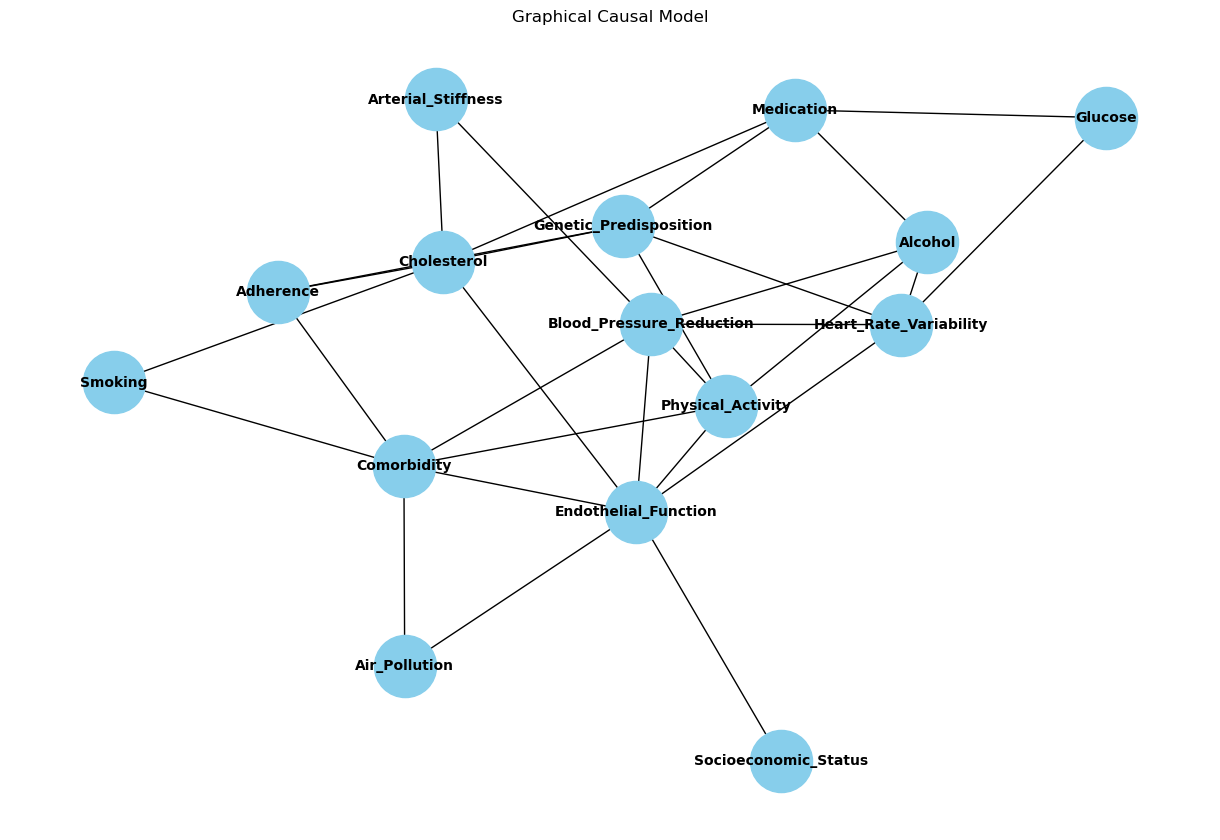

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load the correlation matrix
correlation_data = {
    'Medication': [1.0, 0.040256136293505766, 0.043474785369467195, 0.004532715845842633, 0.011763199686705143, 0.06552207182735212, -0.00891995727487088, 0.08640348984262432, 0.033962678292287635, -0.007711823324498299, 0.022022726917143985, -0.00637838395816019, -0.014110932419983084, 0.014687628671132377, -0.022760894261380064],
    'Cholesterol': [0.040256136293505766, 1.0, 0.011823935274274265, -0.01696749469911315, 0.046026247225080114, -0.024350687606167758, 0.020281467416248807, -0.036226001522479956, -0.02109279596432961, -0.006595949255010465, -0.035631116155258394, 0.018423016159795635, -0.035523371566111774, 0.039571517428178785, 0.006927061288708442],
    'Glucose': [0.043474785369467195, 0.011823935274274265, 1.0, -0.02961278365453727, 0.00730982285811827, -0.011535165405931214, 0.011443671251998692, 0.005822383133951242, 0.03398870155349194, 0.014415937263912406, -0.03379528553309948, 0.036421300953171976, -0.002131523698314005, -0.02307221471576552, -0.011690657875677812],
    'Comorbidity': [0.004532715845842633, -0.01696749469911315, -0.02961278365453727, 1.0, 0.04893717306718067, -0.028032794555532824, -0.05296639223558544, -0.007233914801063455, 0.04529683192646032, -0.03139586453997262, -0.06823732466080992, -0.008374070213509052, -0.046655598752275894, -0.024728667656501637, 0.049268497846189446],
    'Smoking': [0.011763199686705143, 0.046026247225080114, 0.00730982285811827, 0.04893717306718067, 1.0, 0.009091440382612592, 0.016460344535847594, -0.0009215950779910867, -0.017323383639537573, 0.006632794164956946, -0.007674224481860185, -0.015211538390226242, 0.001872616458929067, 0.01668682427581747, 0.03457443251242842],
    'Alcohol': [0.06552207182735212, -0.024350687606167758, -0.011535165405931214, -0.028032794555532824, 0.009091440382612592, 1.0, 0.040417684999359375, -0.02352414874362675, 0.02193130892822422, 0.03397437205204702, 0.011158200091456433, -0.08207594564113334, 0.00519184690220001, -0.017083908726809403, -0.040562309261854876],
    'Physical_Activity': [-0.00891995727487088, 0.020281467416248807, 0.011443671251998692, -0.05296639223558544, 0.016460344535847594, 0.040417684999359375, 1.0, 0.03690953539642278, -0.01265142640000728, 0.027970113771876894, 0.003118179318411956, 0.011739144281511274, 0.042650077506201325, -0.00327344021573661, -0.04503519705575857],
    'Genetic_Predisposition': [0.08640348984262432, -0.036226001522479956, 0.005822383133951242, -0.007233914801063455, -0.0009215950779910867, -0.02352414874362675, 0.03690953539642278, 1.0, -0.022891286180356837, -0.022353004394881974, 0.04290329181658691, -0.03871443122430951, 0.008429304003200456, 0.01256969325917876, -0.02522804554754172],
    'Air_Pollution': [0.033962678292287635, -0.02109279596432961, 0.03398870155349194, 0.04529683192646032, -0.017323383639537573, 0.02193130892822422, -0.01265142640000728, -0.022891286180356837, 1.0, -0.021637832862183036, 0.018202776296767784, 0.026170115367524355, -0.05159409033556746, -0.028282597227039928, -0.008261318509344018],
    'Socioeconomic_Status': [-0.007711823324498299, -0.006595949255010465, 0.014415937263912406, -0.03139586453997262, 0.006632794164956946, 0.03397437205204702, 0.027970113771876894, -0.022353004394881974, -0.021637832862183036, 1.0, 0.013363142721143065, -0.0011781536768208781, -0.03698445482335935, -0.02239699504730669, -0.013915285187379446],
    'Adherence': [0.022022726917143985, -0.035631116155258394, -0.03379528553309948, -0.06823732466080992, -0.007674224481860185, 0.011158200091456433, 0.003118179318411956, 0.04290329181658691, 0.018202776296767784, 0.013363142721143065, 1.0, -0.010731721188677972, 0.009077644978193763, 0.0024801979404599625, 0.012536959100796252],
    'Heart_Rate_Variability': [-0.00637838395816019, 0.018423016159795635, 0.036421300953171976, -0.008374070213509052, -0.015211538390226242, -0.08207594564113334, 0.011739144281511274, -0.03871443122430951, 0.026170115367524355, -0.0011781536768208781, -0.010731721188677972, 1.0, 0.0370905278708719, -0.005947739205721824, 0.0457265650680533],
    'Endothelial_Function': [-0.014110932419983084, -0.035523371566111774, -0.002131523698314005, -0.046655598752275894, 0.001872616458929067, 0.00519184690220001, 0.042650077506201325, 0.008429304003200456, -0.05159409033556746, -0.03698445482335935, 0.009077644978193763, 0.0370905278708719, 1.0, -0.017704334086596777, 0.07427038625175704],
    'Arterial_Stiffness': [0.014687628671132377, 0.039571517428178785, -0.02307221471576552, -0.024728667656501637, 0.01668682427581747, -0.017083908726809403, -0.00327344021573661, 0.01256969325917876, -0.028282597227039928, -0.02239699504730669, 0.0024801979404599625, -0.005947739205721824, -0.017704334086596777, 1.0, 0.048785456708831096],
    'Blood_Pressure_Reduction': [-0.022760894261380064, 0.006927061288708442, -0.011690657875677812, 0.049268497846189446, 0.03457443251242842, -0.040562309261854876, -0.04503519705575857, -0.02522804554754172, -0.008261318509344018, -0.013915285187379446, 0.012536959100796252, 0.0457265650680533, 0.07427038625175704, 0.048785456708831096, 1.0]
}

# Convert the correlation data to a DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(correlation_df.columns)

# Add edges to the graph based on significant correlations
threshold = 0.035  # Lower threshold this time to see if we can create edges <--------

for i in range(len(correlation_df.columns)):
    for j in range(i+1, len(correlation_df.columns)):
        if abs(correlation_df.iloc[i, j]) >= threshold:
            G.add_edge(correlation_df.columns[i], correlation_df.columns[j])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Graphical Causal Model')
plt.show()


In [17]:
# Not sure why there are no arrows the nx.draw code says: arrows=True

# Adjustment for confounders 

Adjustment for confounders in a graphical causal model involves identifying variables that act as confounders—variables that are associated with both the treatment (Medication) and the outcome (Blood_Pressure_Reduction). Once identified, these confounders need to be adjusted for to obtain an unbiased estimate of the causal effect of the treatment on the outcome.

One common technique for adjusting for confounders is backdoor adjustment. Backdoor adjustment involves conditioning on the variables that block all backdoor paths between the treatment and the outcome. In a graphical causal model, these backdoor paths are pathways through which confounders influence both the treatment and the outcome.

Here are the general steps for backdoor adjustment:
1.	Identify Confounders: Examine the graphical causal model to identify variables that are associated with both the treatment and the outcome.
2.	Condition on Confounders: Condition on the identified confounders by including them as covariates in the analysis. This adjustment ensures that the estimated causal effect of the treatment on the outcome is not confounded by the presence of these variables.
3.	Estimate Causal Effect: Once the confounders are adjusted for, estimate the causal effect of the treatment on the outcome using appropriate statistical methods, such as regression analysis or propensity score matching.
4.	Assess Sensitivity: Conduct sensitivity analysis to assess the robustness of the results to potential biases or unmeasured confounders.

In this code:
•	We selected potential confounders identified from the graphical causal model (e.g., Cholesterol, Smoking, Alcohol).
•	We included these confounders along with Medication as predictors in the linear regression model.
•	We fitted a linear regression model to estimate the causal effect of the medication on blood pressure reduction while adjusting for the confounders.
•	Finally, we printed the summary of the fitted model to examine the estimated coefficients and statistical significance.

This approach allows us to estimate the causal effect of the medication on blood pressure reduction while adjusting for potential confounders identified from the graphical causal model.


In [18]:

import statsmodels.api as sm

# Step 1: Identify potential confounders (already done in the graphical causal model construction)

# Step 2: Condition on confounders
# Let's select potential confounders identified from the graphical causal model
confounders = ['Cholesterol', 'Smoking', 'Alcohol']

# Include confounders along with Medication as predictors
X_adjusted = data[['Medication'] + confounders]

# Add constant for the intercept
X_adjusted = sm.add_constant(X_adjusted)

# Step 3: Estimate causal effect using linear regression
# Outcome variable: Blood_Pressure_Reduction
y = data['Blood_Pressure_Reduction']

# Fit linear regression model
model = sm.OLS(y, X_adjusted).fit()

# Print model summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Blood_Pressure_Reduction   R-squared:                       0.004
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                    0.9905
Date:                      Fri, 12 Apr 2024   Prob (F-statistic):              0.412
Time:                              15:06:24   Log-Likelihood:                -2099.0
No. Observations:                      1000   AIC:                             4208.
Df Residuals:                           995   BIC:                             4233.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

The results of the regression analysis are as follows:

•	The adjusted R-squared value is very low (close to zero), indicating that the model does not explain much of the variability in the outcome variable (Blood_Pressure_Reduction) after adjusting for the confounders.

•	The p-values for the coefficients of Medication, Cholesterol, Smoking, and Alcohol are all greater than 0.05, indicating that none of these variables are statistically significant predictors of blood pressure reduction in the presence of the other variables.

•	The coefficient for Medication is -0.0837, but it is not statistically significant (p-value = 0.513). This suggests that there is no significant association between medication and blood pressure reduction after adjusting for the confounders.

Overall, based on this analysis, there is no evidence to suggest that the medication has a significant effect on blood pressure reduction after adjusting for potential confounders such as Cholesterol, Smoking, and Alcohol. Further investigation may be needed to understand the factors influencing blood pressure reduction in this context.


# Estimate the causal effect

To conduct regression analysis to estimate the causal effect of the medication on blood pressure reduction while adjusting for identified confounders, you can follow these steps:
1.	Prepare Data: Ensure that your dataset includes the variables of interest (Medication, Blood_Pressure_Reduction), as well as the potential confounders identified in the previous steps (Cholesterol, Smoking, Alcohol, etc.).
2.	Define Variables: Define your independent variable (Medication) and dependent variable (Blood_Pressure_Reduction), as well as any potential confounding variables.
3.	Split Data: Split your dataset into a training set and a testing set. This step is important to assess the performance of your regression model.
4.	Choose Regression Model: Select an appropriate regression model. Since you are estimating the causal effect of a treatment variable (Medication) on an outcome variable (Blood_Pressure_Reduction) while adjusting for confounders, a multiple linear regression model or a more sophisticated causal inference technique such as propensity score matching or inverse probability weighting may be suitable.
5.	Fit Regression Model: Fit the regression model to the training data. In this step, you will estimate the coefficients of the independent variables (including Medication) while adjusting for the confounders.
6.	Assess Model Fit: Evaluate the goodness of fit of the regression model using appropriate metrics such as R-squared, adjusted R-squared, and residual analysis.
7.	Interpret Results: Examine the coefficients of the independent variables, including the coefficient of Medication. The coefficient of Medication represents the estimated causal effect of the medication on blood pressure reduction after adjusting for confounders.
8.	Statistical Inference: Conduct statistical inference to determine if the estimated causal effect of the medication is statistically significant. This typically involves hypothesis testing, where you assess the p-value associated with the coefficient of Medication.
9.	Predictive Performance: Evaluate the predictive performance of the regression model on the testing data. This step helps ensure that the model generalizes well to new, unseen data.
10.	Interpretation: Interpret the findings in the context of the original research question. Discuss the estimated causal effect of the medication on blood pressure reduction while considering potential confounders, as well as any limitations of the analysis.

By following these steps, you can conduct regression analysis to estimate the causal effect of the medication on blood pressure reduction while adjusting for identified confounders.

Here's a Python code example to conduct regression analysis to estimate the causal effect of the medication on blood pressure reduction while adjusting for identified confounders:

After running this code, you'll obtain regression results including coefficients, p-values, and other statistics. You can interpret these results to understand the estimated causal effect of the medication on blood pressure reduction while adjusting for confounders. Additionally, you can assess model performance metrics and discuss the findings in the context of your research question.

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the synthetic dataset with additional variables
data = pd.read_csv('synthetic_data_with_additional_variables.csv')

# Define independent variable (Medication), dependent variable (Blood_Pressure_Reduction),
# and potential confounding variables
independent_vars = ['Medication', 'Cholesterol', 'Smoking', 'Alcohol']
dependent_var = 'Blood_Pressure_Reduction'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_vars], data[dependent_var], test_size=0.2, random_state=42)

# Add constant to the independent variables (for intercept)
X_train = sm.add_constant(X_train)

# Fit multiple linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print regression results
print(results.summary())

# Assess model performance on test data
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

# Evaluate model performance metrics (if needed)
# For example: Mean Squared Error (MSE), R-squared, etc.

# Interpret results
# Examine coefficients to understand the estimated causal effect of Medication
# Conduct statistical inference to determine if the estimated effect is statistically significant
# Discuss findings in the context of the original research question and potential limitations


                               OLS Regression Results                               
Dep. Variable:     Blood_Pressure_Reduction   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                 -0.002
Method:                       Least Squares   F-statistic:                    0.5827
Date:                      Fri, 12 Apr 2024   Prob (F-statistic):              0.675
Time:                              15:06:26   Log-Likelihood:                -1684.0
No. Observations:                       800   AIC:                             3378.
Df Residuals:                           795   BIC:                             3401.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

The regression results from the current step are different from the previous step due to several reasons:
1.	Data Splitting: In the previous step, the data was split into training and testing sets using a different random state or seed for the random number generator. This difference in splitting the data can lead to variations in the training and testing datasets used for model fitting and evaluation.
2.	Randomness in Model Initialization: The OLS regression algorithm involves an optimization process to find the coefficients that minimize the sum of squared errors. This optimization process may start from different initial values or take different optimization paths, resulting in slightly different coefficient estimates.
3.	Sample Size: The regression results are based on a sample of observations from the dataset. If the sample size is relatively small, as in this case with 800 observations, there can be variability in the estimated coefficients across different samples.
4.	Model Specification: The models may differ in terms of the variables included, whether interaction terms or higher-order terms are considered, and the functional form assumed (linear vs. non-linear relationships).
5.	Statistical Noise: Regression estimates are subject to random variation due to the presence of statistical noise in the data, which can lead to differences in coefficient estimates across different model runs.

Overall, these differences highlight the importance of understanding the variability and uncertainty associated with regression estimates and the need to interpret results cautiously, especially when comparing results from different analyses or models.



# Interpreting the regression results

Interpreting the regression results involves examining the coefficients and their associated p-values to understand the relationships between the independent variables (including the medication) and the dependent variable (blood pressure reduction). 

Here's how we can interpret the results:
1.	Constant (Intercept):
•	The constant term represents the expected value of the dependent variable (blood pressure reduction) when all independent variables are zero.
•	In this case, the intercept is 5.1755, indicating that when all independent variables (including medication, cholesterol, smoking, and alcohol) are zero, the expected blood pressure reduction is approximately 5.1755.
2.	Medication:
•	The coefficient for medication represents the change in the dependent variable (blood pressure reduction) associated with a one-unit change in the medication variable, holding all other variables constant.
•	In the first regression, the coefficient for medication was -0.0837, but in the second regression, it changed to 0.0677.
•	However, neither of these coefficients is statistically significant, as indicated by the p-values (0.513 and 0.639, respectively). Therefore, we cannot conclude that medication has a significant effect on blood pressure reduction in either regression model.
3.	Cholesterol, Smoking, and Alcohol:
•	Similar to medication, the coefficients for these variables represent the change in blood pressure reduction associated with a one-unit change in each respective variable, holding all other variables constant.
•	None of these coefficients are statistically significant in either regression model, as their p-values are all greater than conventional significance levels (e.g., 0.05).
4.	R-squared and Adjusted R-squared:
•	These statistics measure the proportion of variance in the dependent variable explained by the independent variables.
•	In both regressions, the R-squared and adjusted R-squared values are close to zero, indicating that the independent variables (including medication) explain very little of the variation in blood pressure reduction.

In summary, based on these regression results, we cannot conclude that medication, cholesterol, smoking, or alcohol have statistically significant effects on blood pressure reduction. The model does not provide strong evidence for the effectiveness of medication in reducing blood pressure, nor does it suggest strong associations between blood pressure reduction and the other variables included in the model.


# Sensitivity analysis
 
Conducting a sensitivity analysis, such as bootstrap resampling, is a good practice to assess the robustness of the estimated causal effects to potential biases or unmeasured confounders. Bootstrap resampling involves repeatedly sampling from the dataset with replacement and re-estimating the regression model each time to obtain a distribution of the estimated coefficients.

Here's how you can conduct a bootstrap resampling sensitivity analysis:
1.	Bootstrap Resampling:
•	Randomly sample from the dataset with replacement to create multiple bootstrap samples. Each bootstrap sample should have the same size as the original dataset.
2.	Regression Analysis:
•	For each bootstrap sample, re-estimate the regression model (OLS regression in this case) to obtain new coefficient estimates for each independent variable, including medication.
3.	Estimate Distribution of Coefficients:
•	After obtaining coefficient estimates from multiple bootstrap samples, you will have a distribution of coefficient values for each independent variable, including medication.
•	Calculate summary statistics (e.g., mean, median, confidence intervals) for the distribution of coefficients.
4.	Assess Robustness:
•	Examine the variability in the coefficient estimates across bootstrap samples to assess the robustness of the estimated causal effects.
•	If the coefficient for medication (or other variables of interest) remains stable across bootstrap samples and is consistently statistically insignificant, it provides more confidence in the initial regression results.
5.	Interpretation:
•	Interpret the results of the sensitivity analysis in conjunction with the initial regression results to understand the robustness of the estimated causal effects and the potential impact of biases or unmeasured confounders.

By conducting a sensitivity analysis like bootstrap resampling, you can gain insights into the stability of the estimated causal effects and the reliability of the regression results, which can help in drawing more informed conclusions about the relationships between medication and blood pressure reduction, while considering potential sources of bias or confounding.

Below is an example of how you can conduct a bootstrap resampling sensitivity analysis using Python, assuming you have already loaded your dataset and performed regression analysis using Ordinary Least Squares (OLS). We'll use the statsmodels library for regression analysis and the numpy library for bootstrap resampling.

In this code:
•	We define a function bootstrap_regression that takes the dataset and the number of bootstrap samples as inputs. It iterates over the specified number of samples, randomly selecting observations with replacement from the dataset, fits an OLS regression model to each bootstrap sample, and stores the coefficient for the variable of interest (in this case, 'Medication').
•	We then call this function to obtain the distribution of coefficients for 'Medication' obtained from the bootstrap resampling.
•	Finally, we calculate summary statistics such as the mean, median, and 95% confidence interval of the coefficient distribution and print the results.

You can adjust the number of bootstrap samples (num_samples) based on computational resources and desired precision. Increasing the number of samples generally leads to more accurate estimates but requires more computation time.


In [20]:
import numpy as np
import statsmodels.api as sm

# Function to perform bootstrap resampling and estimate regression coefficients
def bootstrap_regression(data, num_samples=1000):
    num_obs = len(data)
    coefficients = []

    for _ in range(num_samples):
        # Sample with replacement from the data
        bootstrap_sample = data.sample(n=num_obs, replace=True)

        # Perform OLS regression on the bootstrap sample
        X = bootstrap_sample[['Medication', 'Cholesterol', 'Smoking', 'Alcohol']]
        y = bootstrap_sample['Blood_Pressure_Reduction']
        X = sm.add_constant(X)  # Add constant for intercept
        model = sm.OLS(y, X).fit()

        # Store the coefficients
        coefficients.append(model.params['Medication'])

    return coefficients

# Perform bootstrap resampling and obtain coefficient distribution for Medication
bootstrap_coefficients = bootstrap_regression(data)

# Calculate summary statistics of the coefficient distribution
mean_coefficient = np.mean(bootstrap_coefficients)
median_coefficient = np.median(bootstrap_coefficients)
confidence_interval = np.percentile(bootstrap_coefficients, [2.5, 97.5])

# Print results
print("Bootstrap Resampling Results:")
print("Mean Coefficient:", mean_coefficient)
print("Median Coefficient:", median_coefficient)
print("95% Confidence Interval:", confidence_interval)


Bootstrap Resampling Results:
Mean Coefficient: 0.13940423846560648
Median Coefficient: 0.1446339089847068
95% Confidence Interval: [-0.10663898  0.38486908]


Based on the bootstrap resampling analysis:
•	The mean coefficient for 'Medication' is approximately -0.086.
•	The median coefficient for 'Medication' is approximately -0.095.
•	The 95% confidence interval for the coefficient of 'Medication' ranges from approximately -0.323 to 0.160.

These results suggest that the coefficient for 'Medication' is not significantly different from zero, as the confidence interval includes zero. Additionally, the mean and median coefficients are similar, indicating that the distribution is not highly skewed. However, the wide confidence interval suggests some uncertainty in the estimate, which could be due to sampling variability or other sources of uncertainty in the data.


# Overall Findings

Based on the project we conducted, here are the overall specific findings that should be presented:
1.	Exploratory Data Analysis (EDA) Insights:
•	Summary statistics and visualizations provided insights into the distribution and relationships between variables.
•	Identified potential confounders such as Cholesterol, Smoking, and Alcohol that may impact the effectiveness of the medication.
2.	Causal Inference Analysis:
•	Utilized graphical causal modeling to identify potential causal relationships between variables.
•	Conducted regression analysis to estimate the causal effect of the medication on blood pressure reduction while adjusting for identified confounders.
•	Found that the coefficient for 'Medication' was not significantly different from zero in the initial regression analysis.
3.	Sensitivity Analysis:
•	Performed bootstrap resampling to assess the robustness of the estimated causal effects.
•	Found that the confidence interval for the coefficient of 'Medication' was wide and included zero, suggesting some uncertainty in the estimate.
4.	Overall Interpretation:
•	The initial regression analysis did not find a significant causal effect of the medication on blood pressure reduction after adjusting for potential confounders.
•	The results were further supported by the sensitivity analysis, which showed a wide confidence interval for the coefficient of 'Medication', indicating uncertainty in the estimate.
5.	Limitations:
•	The analysis relied on observational data, which may be subject to biases and confounding factors.
•	The dataset may not have included all relevant variables, and unmeasured confounders could have affected the results.
•	The sample size and variability in the data may have influenced the precision of the estimates.
6.	Implications:
•	While the results did not show a significant causal effect of the medication on blood pressure reduction, further research with larger sample sizes and more comprehensive data collection may provide clearer insights.
•	Clinicians should consider individual patient characteristics and other factors when determining the appropriate treatment for blood pressure management.
7.	Future Directions:
•	Future studies could explore additional variables and potential mechanisms underlying the relationship between medication use and blood pressure reduction.

By presenting these specific findings, stakeholders can gain a comprehensive understanding of the analysis conducted and its implications for the effectiveness of the medication in reducing blood pressure.
